<a href="https://colab.research.google.com/github/renyuanL/110_project/blob/main/_ry_Google_Stock_Price_Prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM that predicts upwards and downwards trend of google stockprice 
Many layers with dropout regularisation to prevent overfitting

Part 1 - Data Preprocessing

In [396]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import pandas_datareader as pdr 
from  sklearn.preprocessing import MinMaxScaler


In [397]:
dataset_train= pdr.get_data_yahoo('^GSPC', 
                   start='2000-01-01', 
                   end= '2020-01-01'
                   )['Close']

dataset_test= pdr.get_data_yahoo('^GSPC', 
                  start='2020-01-01', 
                  end= '2021-06-15'
                  )['Close']

dataset_train.size, dataset_test.size

(5031, 364)

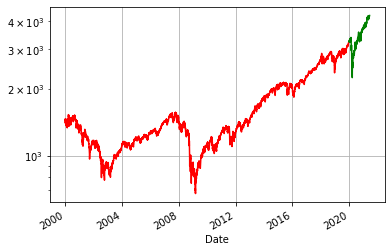

In [398]:
kwargs= {'grid':True, 'logy':True}
dataset_train.plot(c='r', **kwargs)
dataset_test.plot(c='g', **kwargs)

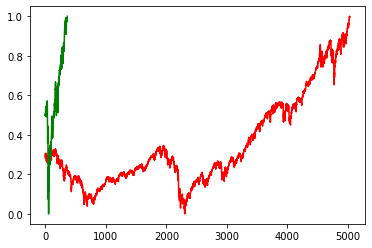

In [399]:

training_set= dataset_train.values
training_set= training_set.reshape(-1,1)

test_set= dataset_test.values
test_set= test_set.reshape(-1,1)

sc= MinMaxScaler(feature_range= (0, 1))
training_set_scaled= sc.fit_transform(training_set) 
test_set_scaled=   sc.fit_transform(test_set) 

plt.plot(training_set_scaled,c='r')
plt.plot(test_set_scaled,c='g')


In [400]:
X_train= []
y_train= []
N= training_set_scaled.size
waitingDays= 100

for i in range(waitingDays, N): # upper bound is number of values 
  X_train.append(training_set_scaled[i-waitingDays:i, 0]) #takes 60 previous stock prices from 60 past stock prices
  y_train.append(training_set_scaled[i, 0]) #contains stock price learned to predict 
X_train, y_train= np.array(X_train), np.array(y_train) # make into numpy arrays 
X_train, y_train


#Need to add dimension to because not only prescition with one stock price but other indicators (like other columns in dataset  or other stocks that may affect this one )

(array([[0.30376165, 0.28199448, 0.2830438 , ..., 0.28250157, 0.27202367,
         0.28185014],
        [0.28199448, 0.2830438 , 0.28356651, ..., 0.27202367, 0.28185014,
         0.2750118 ],
        [0.2830438 , 0.28356651, 0.29839787, ..., 0.28185014, 0.2750118 ,
         0.27364647],
        ...,
        [0.86024911, 0.8611112 , 0.88221919, ..., 0.9937546 , 0.9935088 ,
         0.99995705],
        [0.8611112 , 0.88221919, 0.8746357 , ..., 0.9935088 , 0.99995705,
         1.        ],
        [0.88221919, 0.8746357 , 0.86061187, ..., 0.99995705, 1.        ,
         0.99269356]]),
 array([0.2750118 , 0.27364647, 0.29097829, ..., 1.        , 0.99269356,
        0.99639554]))

In [401]:
# Reshaping- add dimension in numpy array 
X_train= np.reshape(X_train, 
           (X_train.shape[0], X_train.shape[1], 1)) #adds dimension in numpy array
#currently only have one indicator, with new dimension will have more indicators, be compatible for "input shape" of RNN
# format according to keras documentation 
X_train.shape

(4931, 100, 1)

Part 2 - Building the RNN 
stacked lstm with dropout regularization to prevent overfitting

In [434]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [435]:
# Initialising the RNN
regressor= Sequential() 

regressor.add(LSTM(units= 100, #50, 
          return_sequences= True, 
          input_shape= (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 100, #50, 
          return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 100, #50, 
          return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 100, #50
          ))
regressor.add(Dropout(0.2))

regressor.add(Dense(units= 1))

regressor.compile(optimizer='adam', 
         loss= 'mean_squared_error')
regressor.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_47 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_50 (LSTM)               (None, 100, 100)          80400     
_________________________________________________________________
dropout_48 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_51 (LSTM)               (None, 100, 100)          80400     
_________________________________________________________________
dropout_49 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_52 (LSTM)               (None, 100)             

In [450]:
%%time
# Fitting the RNN to the Training set
#have not made connection to training set, training will take place
regressor.fit(X_train, 
       y_train, 
       epochs= 100, #200, 
       batch_size= 100) # CHANGE BACK TO 100 IF NOT WORK
#100 gives good convergence
# trained on certain batch sizes, 

Epoch 1/100
50/50 [==============================] - 1s 28ms/step - loss: 0.0012
Epoch 2/100
50/50 [==============================] - 1s 26ms/step - loss: 9.4298e-04
Epoch 3/100
50/50 [==============================] - 1s 26ms/step - loss: 8.8457e-04
Epoch 4/100
50/50 [==============================] - 1s 27ms/step - loss: 8.5731e-04
Epoch 5/100
50/50 [==============================] - 1s 26ms/step - loss: 8.5102e-04
Epoch 6/100
50/50 [==============================] - 1s 26ms/step - loss: 8.0462e-04
Epoch 7/100
50/50 [==============================] - 1s 26ms/step - loss: 8.8579e-04
Epoch 8/100
50/50 [==============================] - 1s 26ms/step - loss: 9.1168e-04
Epoch 9/100
50/50 [==============================] - 1s 26ms/step - loss: 9.5491e-04
Epoch 10/100
50/50 [==============================] - 1s 26ms/step - loss: 7.7431e-04
Epoch 11/100
50/50 [==============================] - 1s 26ms/step - loss: 7.3808e-04
Epoch 12/100
50/50 [==============================] - 1s 26ms/step 

Part 3 - Making the predictions and visualising the results

In [464]:

inputs= test_set_scaled

X_test= []
for i in range(waitingDays, inputs.size):
    X_test.append(inputs[i-waitingDays:i, 0])
X_test= np.array(X_test)
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(264, 100, 1)

In [452]:

predicted_stock_price= regressor.predict(X_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)

predicted_stock_price= predicted_stock_price[:,0]
#predicted_stock_price

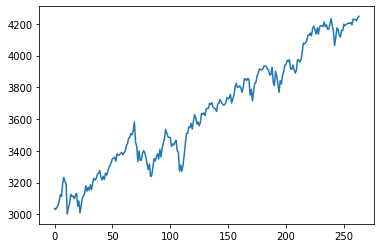

In [453]:
# Visualising the results

real_stock_price= pd.Series(test_set[waitingDays:,0])
real_stock_price.plot()

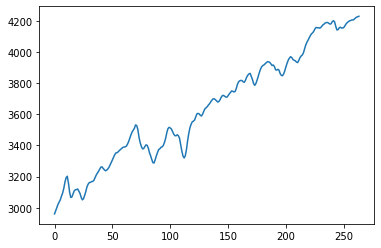

In [454]:

predicted_stock_price= pd.Series(predicted_stock_price)
predicted_stock_price.plot()

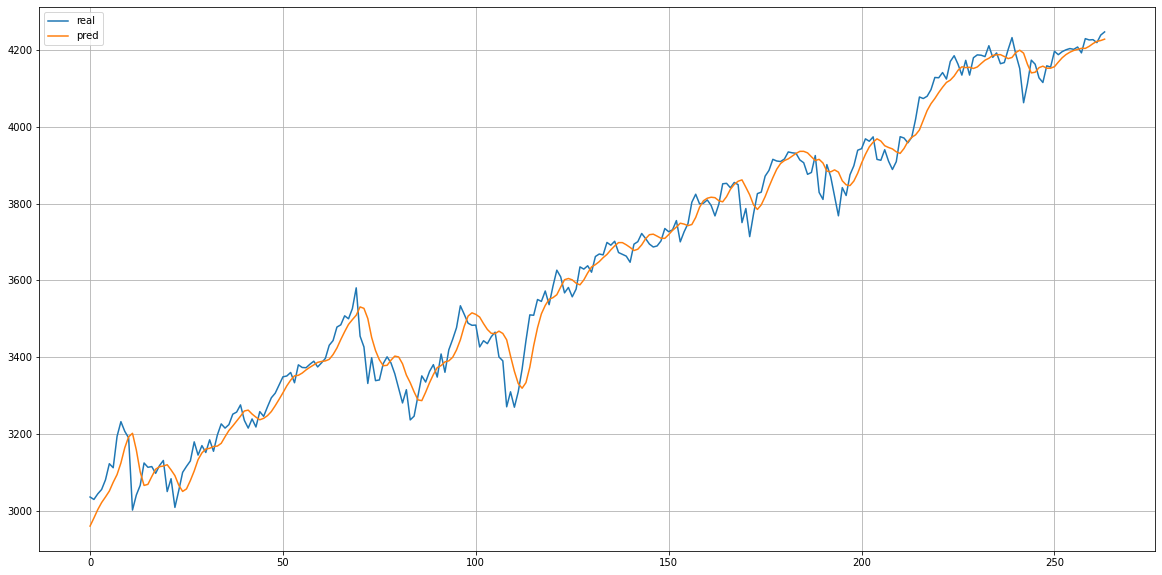

In [455]:
#real_stock_price.plot()
#predicted_stock_price.plot()
aDf= pd.DataFrame()
aDf['real']= real_stock_price
aDf['pred']= predicted_stock_price
aDf.plot(grid=True, figsize=(20,10))

In [456]:
ma=    real_stock_price.rolling(window=waitingDays).mean()
maCenter= real_stock_price.rolling(window=waitingDays, center=True).mean()
aDf['ma']= ma
aDf['maCenter']= maCenter

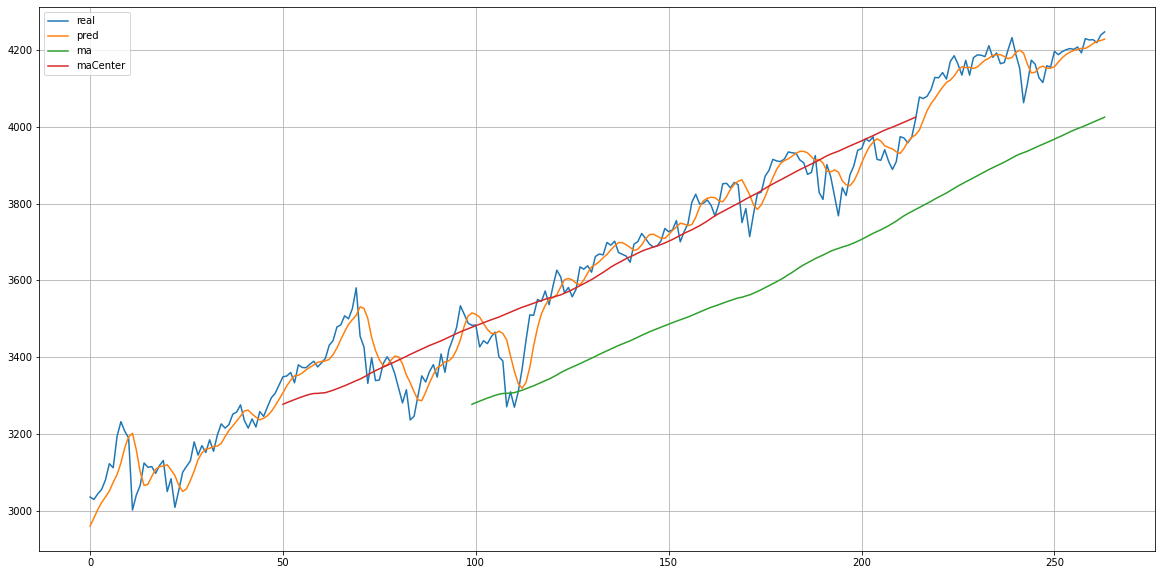

In [457]:
aDf.plot(grid=True, figsize=(20,10))

In [458]:
aDf.corr()

,real,pred,ma,maCenter
real,1.000000,0.991019,0.965606,0.935895
pred,0.991019,1.000000,0.975251,0.951205
ma,0.965606,0.975251,1.000000,0.998287
maCenter,0.935895,0.951205,0.998287,1.000000


In [459]:
ma10=    real_stock_price.rolling(window=10).mean()
ma10Center= real_stock_price.rolling(window=10, center=True).mean()
aDf['ma10']= ma10
aDf['ma10Center']= ma10Center
aDf.corr()

,real,pred,ma,maCenter,ma10,ma10Center
real,1.000000,0.991019,0.965606,0.935895,0.988553,0.994935
pred,0.991019,1.000000,0.975251,0.951205,0.997160,0.996734
ma,0.965606,0.975251,1.000000,0.998287,0.980017,0.977365
maCenter,0.935895,0.951205,0.998287,1.000000,0.957658,0.957177
ma10,0.988553,0.997160,0.980017,0.957658,1.000000,0.995183
ma10Center,0.994935,0.996734,0.977365,0.957177,0.995183,1.000000


In [460]:
aDf= pd.DataFrame()
aDf['real']= real_stock_price
aDf['pred']= predicted_stock_price

for maLen in [2,5,10,20,50,100]:
  maCenter= real_stock_price.rolling(window=maLen, center=True).mean()
  aDf[f'ma{maLen}Center']= maCenter
for maLen in [2,5,10,20,50,100]:
  ma=    real_stock_price.rolling(window=maLen).mean()
  aDf[f'ma{maLen}']= ma

aDf.corr()


,real,pred,ma2Center,ma5Center,ma10Center,ma20Center,ma50Center,ma100Center,ma2,ma5,ma10,ma20,ma50,ma100
real,1.000000,0.991019,0.998633,0.997828,0.994935,0.990907,0.977961,0.935895,0.998633,0.994079,0.988553,0.980645,0.963743,0.965606
pred,0.991019,1.000000,0.994560,0.994685,0.996734,0.994226,0.984083,0.951205,0.994560,0.999366,0.997160,0.990171,0.974968,0.975251
ma2Center,0.998633,0.994560,1.000000,0.998712,0.996427,0.992358,0.979624,0.939245,1.000000,0.996834,0.991160,0.983050,0.966165,0.968172
ma5Center,0.997828,0.994685,0.998712,1.000000,0.998519,0.994949,0.982909,0.946609,0.998712,0.996740,0.991865,0.984058,0.968183,0.971638
ma10Center,0.994935,0.996734,0.996427,0.998519,1.000000,0.997736,0.987436,0.957177,0.996427,0.997851,0.995183,0.988123,0.973189,0.977365
ma20Center,0.990907,0.994226,0.992358,0.994949,0.997736,1.000000,0.993901,0.972264,0.992358,0.994427,0.995776,0.992251,0.979739,0.985148
ma50Center,0.977961,0.984083,0.979624,0.982909,0.987436,0.993901,1.000000,0.991420,0.979624,0.982537,0.986730,0.992198,0.989474,0.993678
ma100Center,0.935895,0.951205,0.939245,0.946609,0.957177,0.972264,0.991420,1.000000,0.939245,0.946353,0.957658,0.973660,0.992843,0.998287
ma2,0.998633,0.994560,1.000000,0.998712,0.996427,0.992358,0.979624,0.939245,1.000000,0.996834,0.991160,0.983050,0.966165,0.968172
ma5,0.994079,0.999366,0.996834,0.996740,0.997851,0.994427,0.982537,0.946353,0.996834,1.000000,0.996476,0.988250,0.971544,0.973205


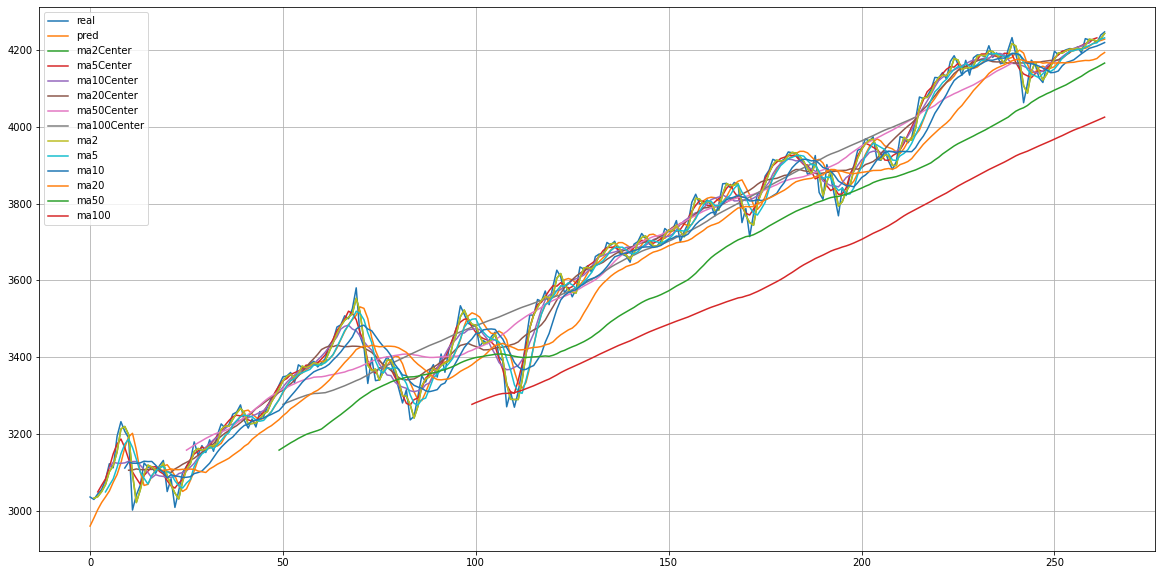

In [461]:
aDf.plot(grid=True, figsize=(20,10))

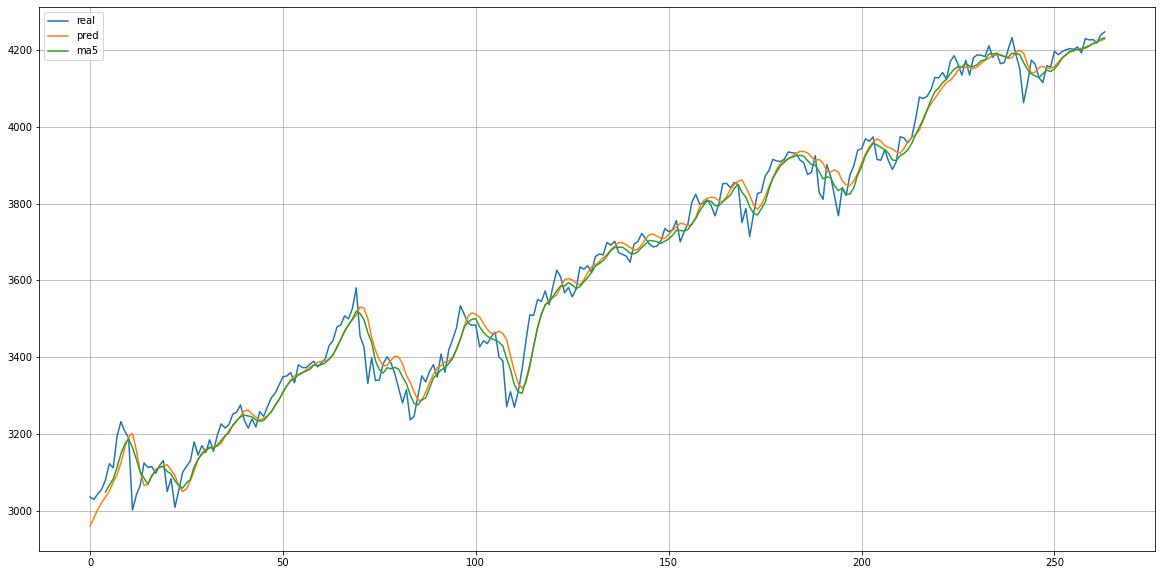

In [462]:
aDf[['real','pred','ma5']].plot(grid=True, figsize=(20,10))

In [463]:
aDf[['real','pred','ma5']].corr()

,real,pred,ma5
real,1.000000,0.991019,0.994079
pred,0.991019,1.000000,0.999366
ma5,0.994079,0.999366,1.000000
